In [27]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_excel('Employed labour .xlsx')
df = df.dropna(subset=['Occupation'])
del df['MED_EARNINGS_FLAG']
df.head()

,Geocode,Geography,HCDD,Occupation,COUNT_ELF_FYFT,MED_EARNINGS,PRCNT_OCC
0,1,Canada,"Total - Highest certificate, diploma or degree",All occupations,9019160.0,53773.0,NaN
1,1,Canada,"Total - Highest certificate, diploma or degree",0 Management occupations,1354890.0,69066.0,15.02
2,1,Canada,"Total - Highest certificate, diploma or degree",00 Senior management occupations,150430.0,102658.0,1.67
3,1,Canada,"Total - Highest certificate, diploma or degree",001 Legislators and senior management,150430.0,102658.0,1.67
4,1,Canada,"Total - Highest certificate, diploma or degree",0011 Legislators,3725.0,65125.0,0.04


In [29]:
mod = df.Occupation
x = []
for i in mod:
    s= len(i)-len(i.lstrip())
    x.append(s)
x = list(set(x))
x

[2, 4, 6, 7, 8, 9, 10, 11]

In [30]:
for i in df.Occupation[:100]:
    print(i)

  All occupations
    0 Management occupations
      00 Senior management occupations
        001 Legislators and senior management
          0011 Legislators
          0012 Senior government managers and officials
          0013 Senior managers - financial, communications and other business services
          0014 Senior managers - health, education, social and community services and membership organizations
          0015 Senior managers - trade, broadcasting and other services, n.e.c.
          0016 Senior managers - construction, transportation, production and utilities
      01-05 Specialized middle management occupations
        011 Administrative services managers
          0111 Financial managers
          0112 Human resources managers
          0113 Purchasing managers
          0114 Other administrative services managers
        012 Managers in financial and business services
          0121 Insurance, real estate and financial brokerage managers
          0122 Banking, credit

In [31]:
code = []
occupation = []
level = []
for i in mod:
    s= len(i)-len(i.lstrip())
    code.append(i.split()[0])
    occupation.append(' '.join(i.split()[1:]))
    level.append(x.index(s))
   

In [32]:
df['job_code']=code
df['occupation']=occupation
df['job_hierarchy'] = level

In [33]:
df['job_hierarchy'].unique()

array([0, 1, 2, 4, 6, 5, 3, 7], dtype=int64)

Insights that can be found from this data set??
1. can we segregate job leevels according to education??
2. avergae salary in a domain
3. most popular market in canada where maxm employement is present
4. province having highest employment
4. total job domain exist in canada

In [34]:
df.groupby(["job_hierarchy","HCDD"])['Occupation'].count()
df[df.Geocode ==1].groupby(['job_hierarchy','HCDD'])['COUNT_ELF_FYFT'].sum().loc[1:].unstack()

HCDD,Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma","No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"Total - Highest certificate, diploma or degree",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above"
job_hierarchy,,,,,,,
1,985185.0,2186605.0,703485.0,2100730.0,9082645.0,271160.0,2835455.0
2,982555.0,2153550.0,702730.0,2085875.0,8792695.0,263625.0,2604270.0
3,2625.0,33045.0,700.0,14880.0,289935.0,7525.0,231160.0
4,981225.0,2184695.0,701925.0,2097950.0,9013885.0,270480.0,2776615.0
5,7665.0,18425.0,2795.0,6455.0,99620.0,1485.0,62790.0
6,974695.0,2162035.0,698070.0,2087265.0,9018295.0,268470.0,2824370.0
7,5960.0,7360.0,3255.0,9080.0,33050.0,920.0,6465.0


In [35]:
midified_df = df

In [36]:
from sklearn import preprocessing

col = df.columns
modified = df[['COUNT_ELF_FYFT','MED_EARNINGS', 'PRCNT_OCC']].values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(modified)
midified_df['COUNT_ELF_FYFT']=x_scaled [:,0]
midified_df['MED_EARNINGS']=x_scaled [:,1]
midified_df['PRCNT_OCC']=x_scaled [:,2]

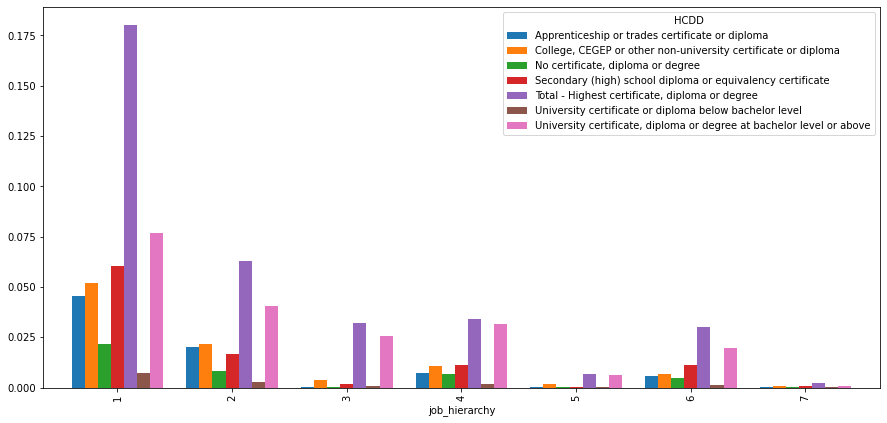

In [37]:
df.groupby(["HCDD","job_hierarchy"]).count()
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
edu_job = df[df.Geocode ==1].groupby(['job_hierarchy','HCDD'])['COUNT_ELF_FYFT'].max().loc[1:].unstack().plot.bar(ax=ax,width = 0.8)
plt.show()

In [38]:
for i in df.Occupation[:50]:
    print(i)

  All occupations
    0 Management occupations
      00 Senior management occupations
        001 Legislators and senior management
          0011 Legislators
          0012 Senior government managers and officials
          0013 Senior managers - financial, communications and other business services
          0014 Senior managers - health, education, social and community services and membership organizations
          0015 Senior managers - trade, broadcasting and other services, n.e.c.
          0016 Senior managers - construction, transportation, production and utilities
      01-05 Specialized middle management occupations
        011 Administrative services managers
          0111 Financial managers
          0112 Human resources managers
          0113 Purchasing managers
          0114 Other administrative services managers
        012 Managers in financial and business services
          0121 Insurance, real estate and financial brokerage managers
          0122 Banking, credit

In [194]:
df.head(15)

,Geocode,Geography,HCDD,Occupation,COUNT_ELF_FYFT,MED_EARNINGS,PRCNT_OCC,job_code,occupation,job_hierarchy
0,1,Canada,"Total - Highest certificate, diploma or degree",All occupations,9019160.0,53773.0,NaN,All,occupations,0
1,1,Canada,"Total - Highest certificate, diploma or degree",0 Management occupations,1354890.0,69066.0,15.02,0,Management occupations,1
2,1,Canada,"Total - Highest certificate, diploma or degree",00 Senior management occupations,150430.0,102658.0,1.67,00,Senior management occupations,2
3,1,Canada,"Total - Highest certificate, diploma or degree",001 Legislators and senior management,150430.0,102658.0,1.67,001,Legislators and senior management,4
4,1,Canada,"Total - Highest certificate, diploma or degree",0011 Legislators,3725.0,65125.0,0.04,0011,Legislators,6
5,1,Canada,"Total - Highest certificate, diploma or degree",0012 Senior government managers and ...,13570.0,109530.0,0.15,0012,Senior government managers and officials,6
6,1,Canada,"Total - Highest certificate, diploma or degree","0013 Senior managers - financial, co...",40850.0,128313.0,0.45,0013,"Senior managers - financial, communications an...",6
7,1,Canada,"Total - Highest certificate, diploma or degree","0014 Senior managers - health, educa...",18650.0,90478.0,0.21,0014,"Senior managers - health, education, social an...",6
8,1,Canada,"Total - Highest certificate, diploma or degree","0015 Senior managers - trade, broadc...",33565.0,85279.0,0.37,0015,"Senior managers - trade, broadcasting and othe...",6
9,1,Canada,"Total - Highest certificate, diploma or degree","0016 Senior managers - construction,...",40060.0,105517.0,0.44,0016,"Senior managers - construction, transportation...",6
